# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Objective
In this project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs

## Data Description:
News Headlines dataset for Sarcasm Detection. The dataset is collected from two news websites, theonion.com and huffingtonpost.com. This new dataset has the following advantages over the existing Twitter datasets:Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embedding.Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements.<br>
Each record consists of three attributes:<br>
  -is_sarcastic: 1 if the record is sarcastic otherwise 0<br>
  -headline: the headline of the news article<br>
  -article_link: link to the original news article.<br>


## Install `Tensorflow2.0` 

In [1]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 53kB/s 
     |████████████████████████████████| 450kB 51.8MB/s 
     |████████████████████████████████| 3.8MB 48.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=62d8fd5fe153c17b9b6df272990e3abc47fbbd5b44f8f4967f3feeb94faf500a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1


## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#Set your project path 
project_path =  "/content/drive/My Drive/NLP/"

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [4]:
import pandas as pd
df = pd.read_json("/content/drive/My Drive/NLP/Sarcasm_Headlines_Dataset.json" ,lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [5]:
#lets check whether the data is balanced (sarcastic and non-sarcastic)
print("Sarcastic Data count:")
print( len(df[df['is_sarcastic']==1]))

print("Non-Sarcastic Data Count:")
print( len(df[df['is_sarcastic']==0]))


Sarcastic Data count:
11724
Non-Sarcastic Data Count:
14985


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, ' Non-sarcasm Vs Sarcasm')

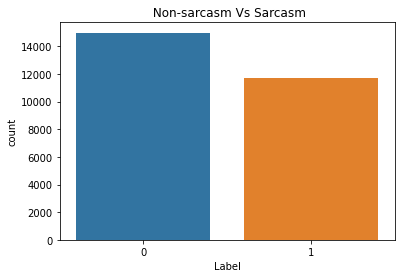

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df.is_sarcastic)
plt.xlabel('Label')
plt.title(' Non-sarcasm Vs Sarcasm')

Data is almost balanced.

In [7]:
#lets check the headline data 
for i,headline in enumerate (df['headline'], 1):
    if i > 20:
        break
    else:
        print(i, headline)

1 former versace store clerk sues over secret 'black code' for minority shoppers
2 the 'roseanne' revival catches up to our thorny political mood, for better and worse
3 mom starting to fear son's web series closest thing she will have to grandchild
4 boehner just wants wife to listen, not come up with alternative debt-reduction ideas
5 j.k. rowling wishes snape happy birthday in the most magical way
6 advancing the world's women
7 the fascinating case for eating lab-grown meat
8 this ceo will send your kids to school, if you work for his company
9 top snake handler leaves sinking huckabee campaign
10 friday's morning email: inside trump's presser for the ages
11 airline passengers tackle man who rushes cockpit in bomb threat
12 facebook reportedly working on healthcare features and apps
13 north korea praises trump and urges us voters to reject 'dull hillary'
14 actually, cnn's jeffrey lord has been 'indefensible' for a while
15 barcelona holds huge protest in support of refugees
16 n

It seems like the data has already in the lowercase form. But there are some special characters.

In [8]:
import re
# filtering only valid data
df['headline'] = df['headline'].apply(lambda x: x.lower())
df['headline'] = df['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df['headline'].head(20)

0     former versace store clerk sues over secret bl...
1     the roseanne revival catches up to our thorny ...
2     mom starting to fear sons web series closest t...
3     boehner just wants wife to listen not come up ...
4     jk rowling wishes snape happy birthday in the ...
5                            advancing the worlds women
6         the fascinating case for eating labgrown meat
7     this ceo will send your kids to school if you ...
8     top snake handler leaves sinking huckabee camp...
9     fridays morning email inside trumps presser fo...
10    airline passengers tackle man who rushes cockp...
11    facebook reportedly working on healthcare feat...
12    north korea praises trump and urges us voters ...
13    actually cnns jeffrey lord has been indefensib...
14    barcelona holds huge protest in support of ref...
15    nuclear bomb detonates during rehearsal for sp...
16    cosby lawyer asks why accusers didnt come forw...
17    stock analysts confused frightened by boar

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [9]:
df = df[['headline','is_sarcastic']]
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret bl...,0
1,the roseanne revival catches up to our thorny ...,0
2,mom starting to fear sons web series closest t...,1
3,boehner just wants wife to listen not come up ...,1
4,jk rowling wishes snape happy birthday in the ...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [10]:

#print df.headline.map(lambda x: len(x)).max()
for c in df:
    if df[c].dtype == 'object':
        print('Max length of column %s: %s\n' %  (c, df[c].map(len).max()))

Max length of column headline: 237



#**## Modelling**

## Import required modules required for modelling.

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, Conv1D, MaxPooling1D ,SpatialDropout1D
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score 

# Set Different Parameters for the model. ( 2 marks)

In [0]:
max_features = 10000
maxlen = 237


#Embedding layer
embedding_size = 200
drop_embed = 0.2 

#dense layer architecture
#n_dense = 128
n_dense=256
drop_dense = 0.2

# LSTM layer architecture:
n_lstm = 128
drop_lstm = 0.2

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['headline'])
#fitting the tokenizer to the text, it will find all words used in the dataset and map each of them to a unique id

After tokenization, the next step is to turn those tokens into lists of sequence.<br>
When we train neural networks for NLP, we need sequences to be in the same size, so we have to use padding, here we use maxlen i.e 237 to pad the sequences.<br>
when training NLP model, labels i.e.our y values are expected to be numpy arrays, so we are converting our is_sarcastic column to arrays.

# Define X and y for your model.

In [14]:
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

In [18]:
for i in range(6):
    print(len(X[i]))

237
237
237
237
237
237


All sequences have the same length.

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [19]:
num_words = len(tokenizer.word_index) +1
print (num_words)

28399


This is the number of distinct words in our dataset.

#**## Word Embedding**

## Get Glove Word Embeddings

In [0]:
glove_file = project_path + "glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

The GloVe model stands for Global Vectors which is an unsupervised learning model which can be used to obtain dense word vectors. Glove models are trained on an aggregated global word-word co-occurrence matrix, giving us a vector space with meaningful sub-structures. glove.6B.200d :- Glove embeddings with 6 Billion words with each word being a 200 dimensional vector.


In [0]:
#EMBEDDING_FILE = project_path + 'glove.6B.200d.txt'
EMBEDDING_FILE = './glove.6B.200d.txt'
embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



In [23]:
len(embeddings)

400000

In [24]:
embeddings['former']   #checking the embedding of the word 'former'(which is present in our data).

array([ 8.3256e-03, -5.9706e-01, -4.8135e-02,  8.3526e-02,  2.4421e-01,
        9.6907e-01,  1.5178e-01,  5.9571e-01,  1.9978e-01, -3.5372e-01,
        5.4857e-01, -1.8311e-01,  1.1177e-01,  1.7577e-01,  6.1527e-01,
       -2.6496e-01,  4.8903e-01, -4.2223e-03, -1.3096e-01,  4.8057e-01,
        2.4773e-01,  2.9303e+00,  3.5296e-01, -3.8154e-01,  2.3455e-01,
        1.3340e-01, -4.6308e-02, -7.1114e-01,  1.4125e-01,  7.2219e-02,
       -2.6387e-01,  8.7342e-02, -2.4661e-01,  1.1451e-01, -3.2146e-01,
       -3.4255e-01, -3.2411e-01, -1.9429e-01, -8.2964e-02,  4.0635e-01,
       -2.8021e-01, -1.4439e-01, -5.4128e-01, -1.9016e-01, -2.9388e-01,
       -2.0048e-01,  3.0930e-01,  7.3740e-02,  4.0183e-01,  6.0756e-02,
       -5.1502e-01,  1.5337e-01,  2.2847e-01,  1.0438e-01, -1.2577e-02,
        1.2794e-01,  1.2431e-01, -6.7420e-01, -3.3534e-02,  6.2589e-01,
        4.6101e-01,  4.0652e-02, -5.6304e-01, -2.0489e-01,  6.7082e-01,
       -3.4924e-01,  4.7787e-02,  1.0037e-01,  2.8402e-01,  7.50

it is a word embedding of 200 dimension.

# Create a weight matrix for words in training docs

In [25]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

In [26]:
len(embedding_matrix)

28399

we created the embedding matrix for all the distinct words in our dataset using the glove embeddings.

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


We build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors, i.e.they will be adjacent in the word vector space<br>
The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.

In [0]:

model = Sequential()

#Embedding layer
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix])) 
model.add(SpatialDropout1D(drop_embed))

#Bidirectional stacked LSTM Layer
model.add(Bidirectional(LSTM(n_lstm, return_sequences = True,dropout=drop_lstm)))
model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))

#dense layer
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(drop_dense))

#output Dense Layer
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         5679800   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 200)         0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

### Configure the Model

In [0]:
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


### Spiltting the data to training and validation

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(21367, 237) (21367,)
(5342, 237) (5342,)


In [0]:
batch_size = 100
epochs = 5


In [33]:

history = model.fit(X_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs, verbose=1, 
          validation_data=(X_test, y_test))

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 939s 44ms/sample - loss: 0.4831 - accuracy: 0.7589 - val_loss: 0.3648 - val_accuracy: 0.8469
Epoch 2/5
21367/21367 [==============================] - 936s 44ms/sample - loss: 0.3375 - accuracy: 0.8554 - val_loss: 0.3318 - val_accuracy: 0.8671
Epoch 3/5
21367/21367 [==============================] - 934s 44ms/sample - loss: 0.2808 - accuracy: 0.8826 - val_loss: 0.2943 - val_accuracy: 0.8765
Epoch 4/5
21367/21367 [==============================] - 944s 44ms/sample - loss: 0.2363 - accuracy: 0.9031 - val_loss: 0.2800 - val_accuracy: 0.8858
Epoch 5/5
21367/21367 [==============================] - 925s 43ms/sample - loss: 0.1965 - accuracy: 0.9195 - val_loss: 0.2991 - val_accuracy: 0.8852


In [0]:

y_pred = model.predict(X_test)

In [35]:
y_pred[0],y_test[0]

(array([0.9981636], dtype=float32), 1)

In [36]:
print("roc-auc-score of the model :")
"{:0.2f}".format(roc_auc_score(y_test, y_pred)*100.0)

roc-auc-score of the model :


'95.29'

Model's roc-auc score is 95.29. <br>
Last epoch (5th) one has the validation accuracy around 0.89 and training accuracy around 0.92.

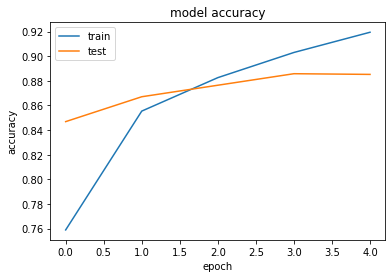

In [37]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

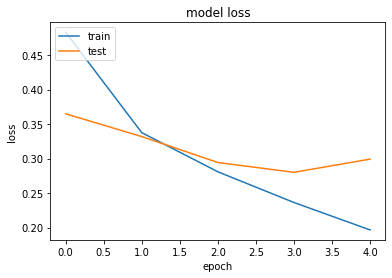

In [38]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Summary


Our model has :<br>
Embedding layer with embedding dimension as 200 and vocab_size 28399  and used pre-trained weight matrix glove.6B.200d to generate word embeddings <br>
Then bidirectional stacked LSTM layers with 128 neurons, and drop_out added is 20% <br>
Then Dense layer with 256 hidden neurons and activation function as 'relu', and 20% drop out added <br>
Finally, output dense layer with single neuron and with sigmoid activation function. <br>
Training accuracy 5th epoch is : 91.95<br>
Validation accuracy 5th epoch is : 88.52<br><br>
This model has got the accuracy roc-auc-score of : 95.29<br>
